# RANDOM FOREST CLASSIFICATION ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WSN.csv')
del df[' id']
df.head()

,Time,Is_CH,who_CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned_Energy,Attack_type
0,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [3]:
df=df.dropna()

In [4]:
df = df.rename({' Time': 'Time'}, axis=1)
df = df.rename({' Is_CH': 'Is_CH'}, axis=1)
df = df.rename({' who_CH': 'who_CH'}, axis=1)
df = df.rename({' Dist_To_CH': 'Dist_To_CH'}, axis=1)
df = df.rename({' ADV_S': 'ADV_S'}, axis=1)
df = df.rename({' ADV_R': 'ADV_R'}, axis=1)
df = df.rename({' JOIN_S': 'JOIN_S'}, axis=1)
df = df.rename({' JOIN_R': 'JOIN_R'}, axis=1)
df = df.rename({' SCH_S': 'SCH_S'}, axis=1)
df = df.rename({' SCH_R': 'SCH_R'}, axis=1)
df = df.rename({' DATA_S': 'DATA_S'}, axis=1)
df = df.rename({' DATA_R': 'DATA_R'}, axis=1)
df = df.rename({' Data_Sent_To_BS': 'Data_Sent_To_BS'}, axis=1)
df = df.rename({' dist_CH_To_BS': 'dist_CH_To_BS'}, axis=1)
df = df.rename({' send_code ': 'send_code '}, axis=1)

In [5]:
df.columns

Index(['Time', 'Is_CH', 'who_CH', 'Dist_To_CH', 'ADV_S', 'ADV_R', 'JOIN_S',
       'JOIN_R', 'SCH_S', 'SCH_R', 'Rank', 'DATA_S', 'DATA_R',
       'Data_Sent_To_BS', 'dist_CH_To_BS', 'send_code ', 'Expaned_Energy',
       'Attack_type'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Attack_type']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [7]:
df = df.drop_duplicates()

In [8]:
x1 = df.drop(labels='Attack_type', axis=1)
y1 = df.loc[:,'Attack_type']

In [9]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({3: 332040, 2: 12602, 0: 6767, 4: 6593, 1: 3157})
OVER SAMPLING DATA COUNT  :  Counter({3: 332040, 1: 332040, 4: 332040, 2: 332040, 0: 332040})


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  1328160
NUMBER OF TEST DATASET      :  332040
TOTAL NUMBER OF DATASET    :  1660200


In [11]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  1328160
NUMBER OF TEST DATASET      :  332040
TOTAL NUMBER OF DATASET    :  1660200


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
predicted = RFC.predict(x_test)

In [15]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFICATION:\n\n',cr)

THE CLASSIFICATION REPORT OF RANDOM FOREST CLASSIFICATION:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     66408
           1       1.00      1.00      1.00     66408
           2       1.00      1.00      1.00     66408
           3       1.00      1.00      1.00     66408
           4       1.00      1.00      1.00     66408

    accuracy                           1.00    332040
   macro avg       1.00      1.00      1.00    332040
weighted avg       1.00      1.00      1.00    332040



In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFICATION:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFICATION:


 [[66408     0     0     0     0]
 [    0 66408     0     0     0]
 [    0     0 66408     0     0]
 [    1    53    37 66284    33]
 [    0     0     0     0 66408]]


In [17]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFICATION IS :",a*100)

THE ACCURACY SCORE OF RANDOM FOREST CLASSIFICATION IS : 99.96265510179497


In [18]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RANDOM FOREST CLASSIFICATION IS :",hl*100)

THE HAMMING LOSS OF RANDOM FOREST CLASSIFICATION IS : 0.03734489820503554


THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFICATION:


[[66408     0     0     0     0]
 [    0 66408     0     0     0]
 [    0     0 66408     0     0]
 [    1    53    37 66284    33]
 [    0     0     0     0 66408]]


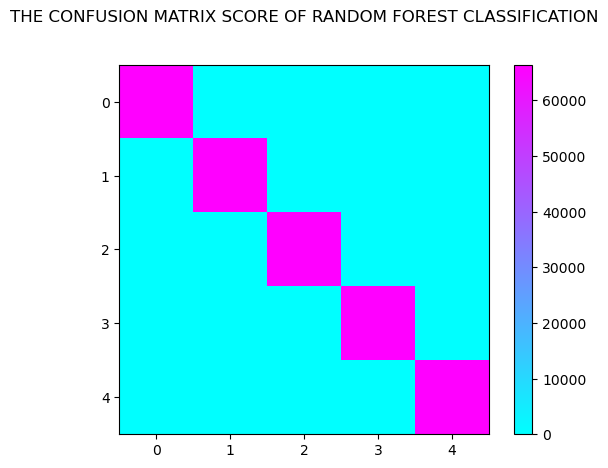

In [19]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFICATION\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFICATION:\n\n')
print(cm)
plot_confusion_matrix(cm)

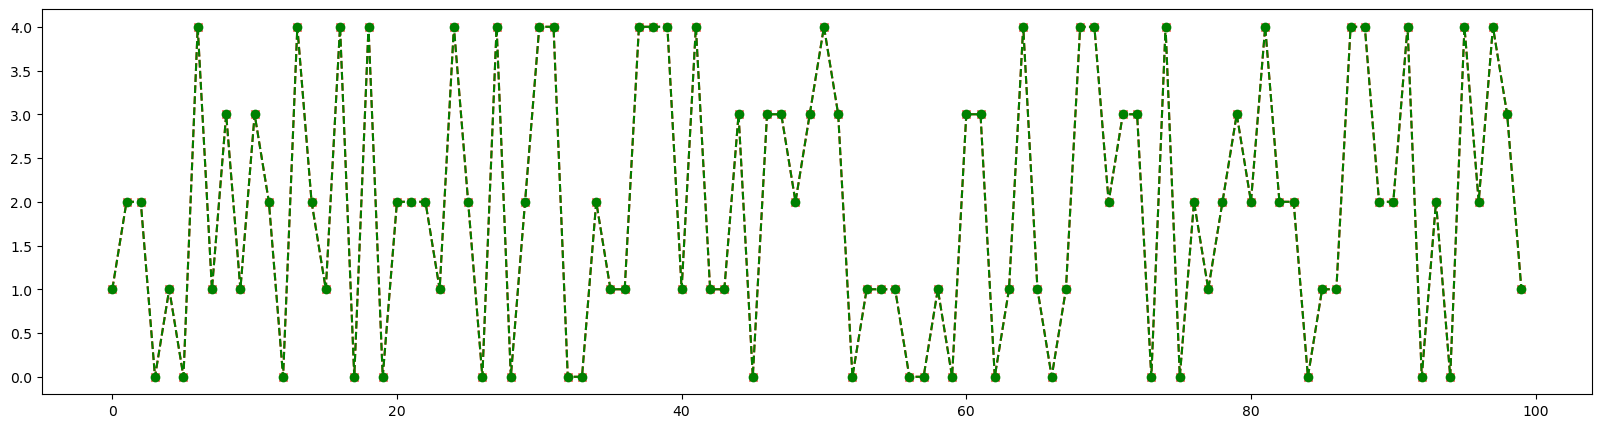

In [20]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [21]:
import joblib
joblib.dump(RFC, 'MODEL.pkl')

['MODEL.pkl']